In [35]:
import numpy as np
from scipy.special import rel_entr

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


In [9]:
classes = ['a', 'b', 'c', 'd']
p = np.array([0, 1, 0, 0])
q = np.array([0.2, 0.5, 0.2, 0.1])

In [10]:
kl = rel_entr(p, q)  # KL divergence
print(kl)

[0.         0.69314718 0.         0.        ]


In [11]:
print(np.sum(kl))

0.6931471805599453


In [13]:
def kl_div(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

print(kl_div(p, q))

0.6931471805599453


/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/2349610778.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/2349610778.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


In [14]:
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

print(cross_entropy(p, q))

0.6931471805599453


In the event that we have a distribution with all probability mass on a single element (as we do above - all mass is centered on the element `b`), the cross entropy and kl divergence between `p` and `q` will be equivalent. 

In [48]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.1, 0.3, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.2, 0.05])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

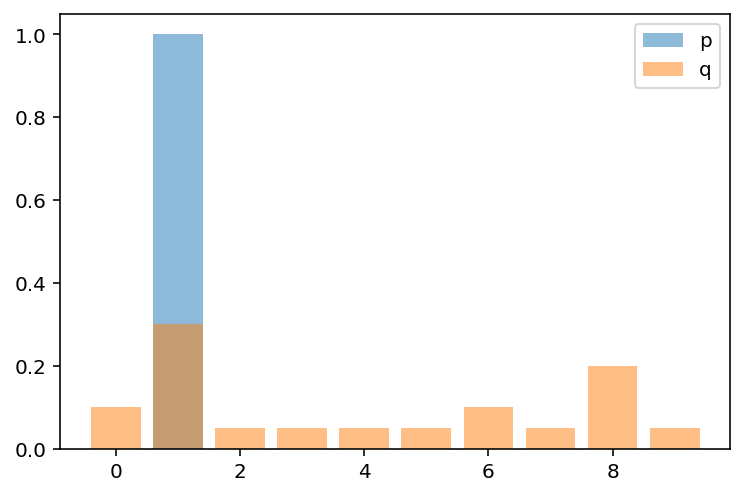

In [45]:
plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.legend();

In [46]:
# Cross entropy
print(cross_entropy(p, q))

1.2039728043259361


In [47]:
# KL divergence
print(kl_div(p, q))

1.2039728043259361


/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/2349610778.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/2349610778.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


In [58]:
print(p)
print(q)

[0 1 0 0 0 0 0 0 0 0]
[0.1  0.3  0.05 0.05 0.05 0.05 0.1  0.05 0.2  0.05]


In [70]:
non_i_idx = set(list(range(len(p)))) - {idx_of_i}
non_i_idx

{0, 2, 3, 4, 5, 6, 7, 8, 9}

In [72]:
q[list(non_i_idx)]

array([0.1 , 0.05, 0.05, 0.05, 0.05, 0.1 , 0.05, 0.2 , 0.05])

In [76]:
# New loss
ce = cross_entropy(p, q)
ce

1.2039728043259361

In [81]:
def binary_discrimination_constraint(p, q):
    C = len(p)
    
    idx_of_y = np.where(p == 1)[0][0]
    pi_y = q[idx_of_y]

    non_y_idx = list(set(list(range(len(p)))) - {idx_of_y})
    
    summation = 0
    for j in non_y_idx:
        pi_j = q[j]
        summation += np.log(1 / (1 + (pi_j / pi_y)))

    constant = -(1 / (C - 1))
    return constant * summation 

bdc = binary_discrimination_constraint(p, q)
bdc

0.22345487195923366

In [84]:
def binary_exclusion_constraint(p, q):
    C = len(p)

    idx_of_y = np.where(p == 1)[0][0]
    pi_y = q[idx_of_y]
    non_y_idx = list(set(list(range(len(p)))) - {idx_of_y})

    summation = 0
    for i in non_y_idx:
        for j in non_y_idx:
            if i == j:
                continue

            pi_i = q[i]
            pi_j = q[j]
            l1 = np.log(1 / (1 + (pi_j / pi_i)))
            l2 = np.log(1 / (1 + (pi_i / pi_j)))
            summation += l1 + l2

    constant = -1 / (2 * (C - 1) * (C - 2))

    return constant * summation


bec = binary_exclusion_constraint(p, q)
bec

0.7532400293788323

In [85]:
def total_loss(p, q):
    return cross_entropy(p, q) + binary_discrimination_constraint(p, q) + binary_exclusion_constraint(p, q)

In [86]:
total_loss(p, q)

2.180667705664002

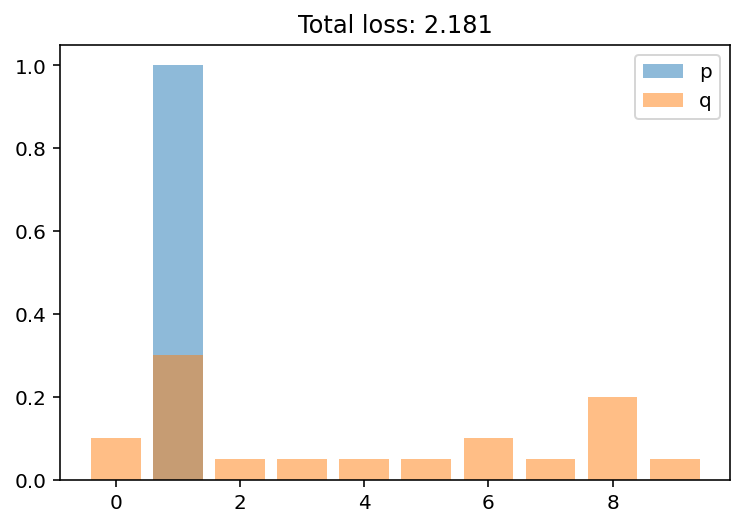

In [89]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.1, 0.3, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.2, 0.05])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

tl = total_loss(p, q)

plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'Total loss: {tl:.3f}')
plt.legend();



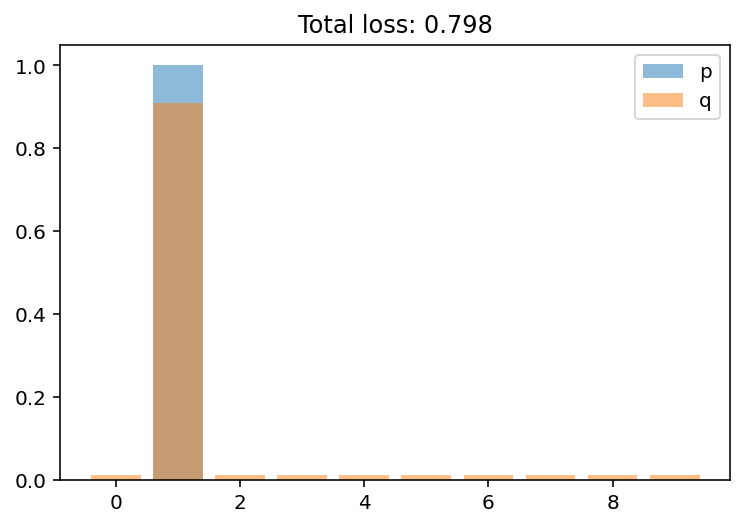

In [92]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

tl = total_loss(p, q)

plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'Total loss: {tl:.3f}')
plt.legend();



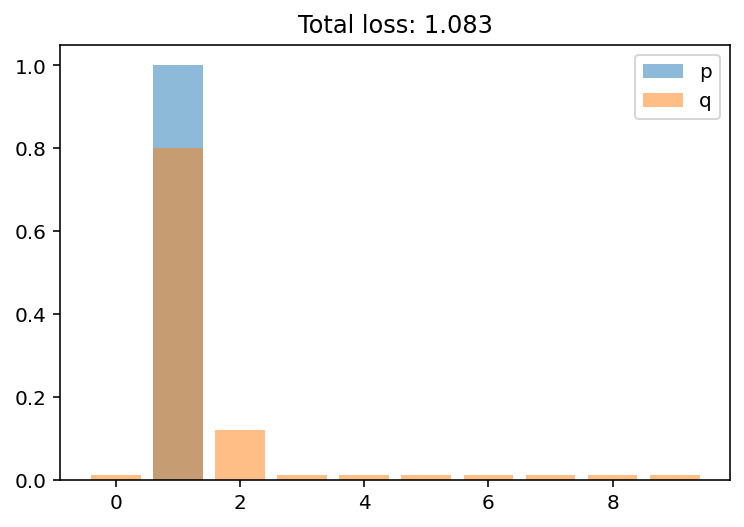

In [96]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.01, 0.8, 0.12, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

tl = total_loss(p, q)

plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'Total loss: {tl:.3f}')
plt.legend();



1.0


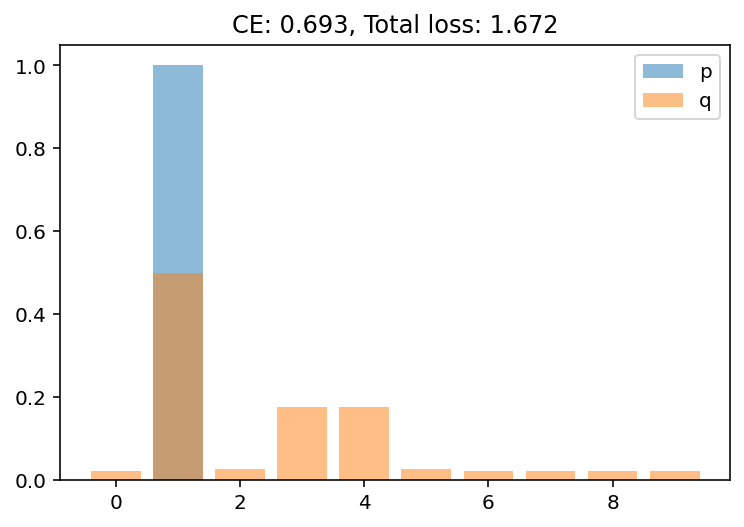

In [118]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.02, 0.5, 0.025, 0.175, 0.175, 0.025, 0.02, 0.02, 0.02, 0.02])
print(sum(q))
assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

ce = cross_entropy(p, q)
bdc = binary_discrimination_constraint(p, q)
bec = binary_exclusion_constraint(p, q)
tl = total_loss(p, q)

plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'CE: {ce:.3f}, Total loss: {tl:.3f}')
# plt.title(f'CE: {ce:.3f}, BDC: {bdc:.3f}, BEC: {bec:.3f}, Total loss: {tl:.3f}')
plt.legend();



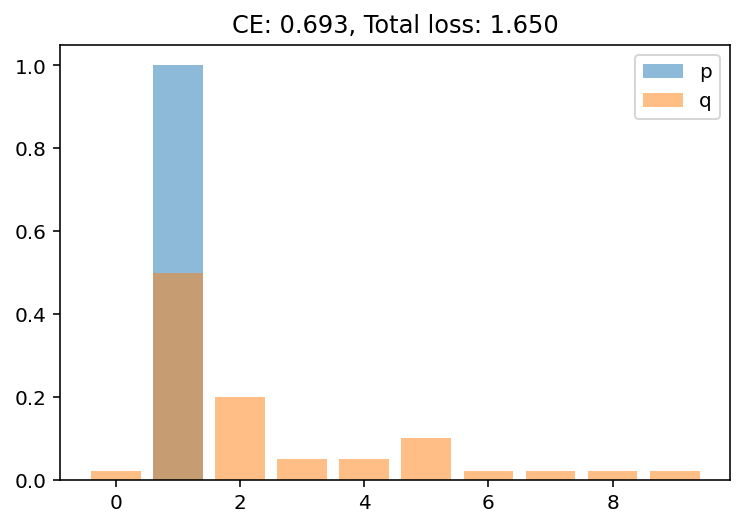

In [113]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.02, 0.5, 0.2, 0.05, 0.05, 0.1, 0.02, 0.02, 0.02, 0.02])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

ce = cross_entropy(p, q)
bdc = binary_discrimination_constraint(p, q)
bec = binary_exclusion_constraint(p, q)
tl = total_loss(p, q)


plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'CE: {ce:.3f}, Total loss: {tl:.3f}')
# plt.title(f'CE: {ce:.3f}, BDC: {bdc:.3f}, BEC: {bec:.3f}, Total loss: {tl:.3f}')
plt.legend();



0.05555555555555555

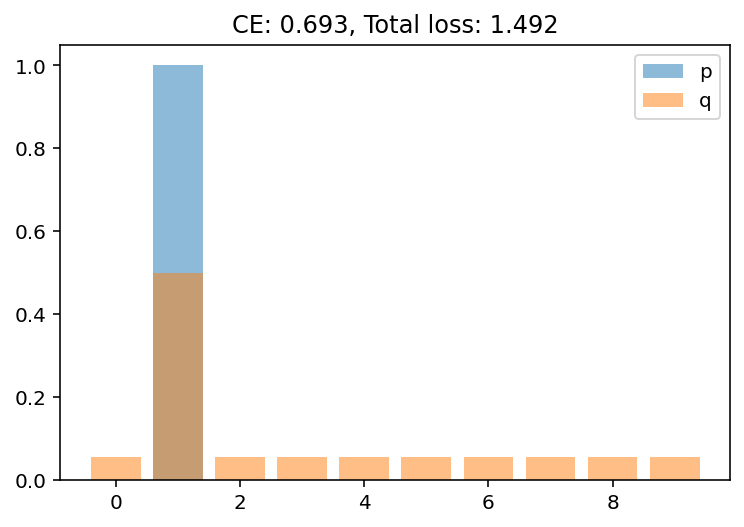

In [112]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.5 / 9, 0.5, 0.5 / 9, 0.5 / 9, 0.5 / 9, 0.5 / 9, 0.5 / 9, 0.5 / 9, 0.5 / 9, 0.5 / 9])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

ce = cross_entropy(p, q)
bdc = binary_discrimination_constraint(p, q)
bec = binary_exclusion_constraint(p, q)
tl = total_loss(p, q)


plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'CE: {ce:.3f}, Total loss: {tl:.3f}')
# plt.title(f'CE: {ce:.3f}, BDC: {bdc:.3f}, BEC: {bec:.3f}, Total loss: {tl:.3f}')
plt.legend();



In [106]:
0.1 / 8

0.0125

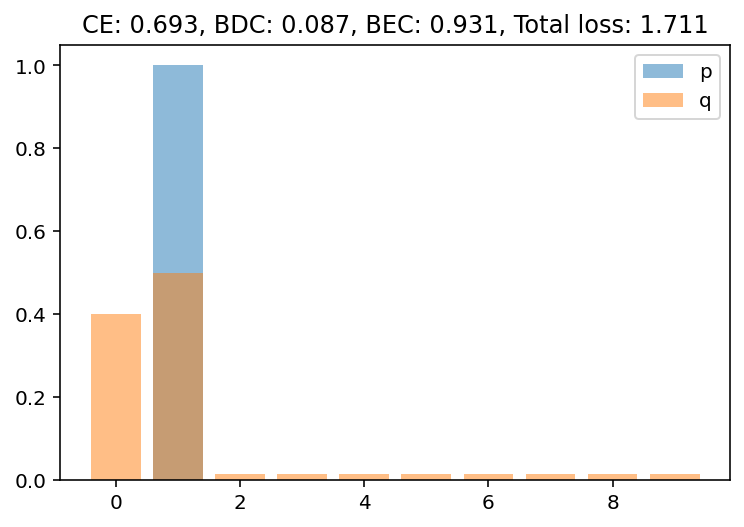

In [107]:
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
q = np.array([0.4, 0.5, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125])

assert len(p) == len(q)
assert np.sum(p) == 1
assert np.sum(q) == 1

ce = cross_entropy(p, q)
bdc = binary_discrimination_constraint(p, q)
bec = binary_exclusion_constraint(p, q)
tl = total_loss(p, q)


plt.bar(x=np.arange(0, len(p)), height=p, alpha=0.5, label='p')
plt.bar(x=np.arange(0, len(q)), height=q, alpha=0.5, label='q')
plt.title(f'CE: {ce:.3f}, BDC: {bdc:.3f}, BEC: {bec:.3f}, Total loss: {tl:.3f}')
plt.legend();



In [109]:
import numpy as np

def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

def kl_div(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))


true_distribution = np.array([0, 1, 0, 0]) # class was b
estimated_distribution = np.array([0.2, 0.5, 0.2, 0.1]) 

In [110]:
cross_entropy(true_distribution, estimated_distribution)

0.6931471805599453

In [111]:
kl_div(true_distribution, estimated_distribution)

/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/3962786322.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/var/folders/bf/ytfysjqx15v252xy049gw1qm0000gn/T/ipykernel_38924/3962786322.py:7: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


0.6931471805599453